This is the penultimate notebook in the h-blend series, related to the semi-final notebooks and this competition. Here we summarize the various sub-approaches in [semi-final.1](https://www.kaggle.com/code/nina2025/s5e9-semi-final-1) and [semi-final.2](https://www.kaggle.com/code/nina2025/s5e9-semi-final-2). This can be easily observed in these notebooks. A verbal description of the differences between the approaches was presented on the [page](https://www.kaggle.com/code/mehrankazeminia/s5e9-songs-rmse-cage/comments) of Hungarian master Mehran Kazeminia during this competition and during the discussion of these two different technologies (h-blend and Cage), or rather their tandem. Their connection brings us half a step closer to the assumption that there is a topological path in the case of "friendly intersection". Research in this direction will continue.

We will present one more notebook – this will be the last notebook from our work related to this competition and blend development. It will be called Ensemble of Solutions – the same thing, with one small change: it will be an active application – meaning it will be ready to "accept" private data. It will also be assembled from excellent public solutions. Data on the work of each participant in this application will be sent to a dataset, which in turn will be attached to the notebook. We do this so that anyone interested in our work can easily, quickly, and calmly conduct several experiments. So that at the end of the journey, before the final dispatch, they might discover something useful and important.

Files [26.37987](https://www.kaggle.com/datasets/nina2025/26-september-2025-ps-s5e9) were originally different – one file, Mehran Kazeminia's, was received on September 25, 2025, and the other, [26.37987](https://www.kaggle.com/code/mehrankazeminia/s5e9-songs-rmse-cage), was received five days earlier. They have the same names, but their content is different. So, we'll try running them through the h-blend gateway.

files:
 - LB = 26_37987_1 - [25-september-2025-PS-s5e9](https://www.kaggle.com/datasets/nina2025/26-september-2025-ps-s5e9)
 - LB = 26_37987_2 - [S5E9🎵Songs |🔒RMSE Cage](https://www.kaggle.com/code/mehrankazeminia/s5e9-songs-rmse-cage)


#### [Appendix](#Appendix_advice)
My heartfelt advice: take a quick look at it.

In [1]:
import ast
import numpy as np
import pandas as pd

from bokeh.plotting import figure, gridplot 
from bokeh.io import output_file, show, output_notebook
output_notebook()

Loading BokehJS ...

# Bokeh

In [2]:
def color_scheme(color):
    colors    = ['red','green','blue']
    clr_alls  = ['crimson',"forestgreen",'mediumblue',"darkmagenta",'gold',"silver"]
    clr_alls2 = ['red',"green",'blue',"silver",'gold']
    clr_alls3 = ['darkmagenta',"forestgreen",'mediumblue']
    clr_Red   = ["firebrick","orangered","crimson",'tomato',"red"]
    clr_Red4  = ["firebrick","orangered","crimson",'tomato']
    clr_Green = ["darkgreen","limegreen","green",'lime',"forestgreen"]
    clr_Green2= ['olivedrab',"darkgreen","forestgreen"]
    clr_Green3= ["darkmagenta",'olivedrab',"darkgreen"]
    clr_Blue  = ['midnightblue',"royalblue","mediumblue","blue","steelblue",'cyan']
    clr_Blue4 = ['midnightblue',"royalblue","mediumblue","steelblue"]
    clr_Brown = ["maroon","sienna","chocolate","sandybrown",'brown']
    clr_Brown3= ["maroon","sienna","sandybrown"]
    clr_Two   = ['crimson','mediumblue']
    clr_Two2  = ['crimson','darkgreen']
    clr_tes9  = clr_Red4 + ['darkmagenta'] + clr_Blue4
    clr_tes10 = ['darkmagenta'] + clr_Red + clr_Blue
    clr_tes11 = ['darkmagenta'] + clr_Brown + clr_Green
    if color == 'Two2':  colors = clr_Two2   [0:len(fs_names)]
    if color == 'Two':   colors = clr_Two    [0:len(fs_names)]
    if color == 'alls':  colors = clr_alls   [0:len(fs_names)]
    if color == 'alls2': colors = clr_alls2  [0:len(fs_names)]
    if color == 'alls3': colors = clr_alls3  [0:len(fs_names)]
    if color == 'red':   colors = clr_Red    [0:len(fs_names)]
    if color == 'green': colors = clr_Green  [0:len(fs_names)]
    if color == 'green2':colors = clr_Green2 [0:len(fs_names)]
    if color == 'green3':colors = clr_Green3 [0:len(fs_names)]
    if color == 'blue':  colors = clr_Blue   [0:len(fs_names)]
    if color == 'brown': colors = clr_Brown  [0:len(fs_names)]
    if color == 'brown3':colors = clr_Brown3 [0:len(fs_names)]
    if color == 'tes9':  colors = clr_tes9   [0:len(fs_names)]
    if color == 'tes10': colors = clr_tes10  [0:len(fs_names)]
    if color == 'tes11': colors = clr_tes11  [0:len(fs_names)]
    return colors

In [3]:
def bokeh_show(
        params,
        df_cross,
        colors, 
        show_figures1, 
        show_figures2,
        color_cross):
    
    def dossier(js,subms,cols):
        def quant(i,js,subms,cols):
            return {"c" : i, "q" : sum([1 for subm in cols[i] if subm == subms[js]])}
        return {
            'name' : subms[js],
            'q_in' : [quant(i,js,subms,cols) for i in range(len(subms))]
        }
    alls = pd.read_csv(f'tida_desc.csv')
    matrix = [ast.literal_eval(str(row.alls)) for row in alls.itertuples()]
    subms = sorted(matrix[0])
    cols = [[data[i] for data in matrix] for i in range(len(subms))]
    df_subms = pd.DataFrame({f'col_{i}': [x[i] for x in matrix] for i in range(len(subms))})
    dossiers = [dossier(js,subms,cols) for js in range(len(subms))]
    subm_names = [one_dossier['name'] for one_dossier in dossiers]
    figures1,qss,i = [],[],0
    height = 85 if len(colors)==2\
        else 134 if len(colors)==3 else (154 if len(colors)==4 else 174)
    for one_dossier in dossiers: 
        i_col = 'alls. ' + str(one_dossier['q_in'][i]['c'])
        qs = [one['q'] for one in one_dossier['q_in']]
        x_names = [name.replace("Group","").replace("subm_","") for name in subm_names]
        width = 157  if len(colors) == 5\
            else (121 if len(colors) == 8\
            else (131 if len(colors) == 9\
            else (141 if len(colors) == 10\
            else (171 if len(colors) == 11 else 133))))
        f = figure(x_range=x_names,width=width, height=height, title=i_col)
        f.vbar(x=x_names, width=0.585, top=qs, color=colors)
        figures1.append(f)
        qss.append(qs)
        i+=1
    grid = gridplot([figures1])
    output_file('tida_alls.html')
    if show_figures1 == True: show(grid)
    sub_wts = params['subwts']
    main_wts = [subm['weight'] for subm in params['subm']]
    mms,acc_mass = [],[]
    for j in range(len(dossiers)):
        one_dossier = dossiers[j]
        qs = [one['q'] for one in one_dossier['q_in']]
        mm = [qs[h] * (main_wts[j] + sub_wts[h]) for h in range(len(sub_wts))]
        mass = sum(mm)
        mms.append(mm)
        acc_mass.append(round(mass))                        #subm_names[::-1]
    y_names = [name + " - " + str(mass) for name,mass in zip(subm_names,acc_mass)]
    f1 = figure(y_range=y_names, width=313, height=height, title='relations of general masses')
    f1.hbar(y=y_names, height=0.585, right=acc_mass, left=0, color=colors)
    output_file('tida_alls2.html')
    alls = [f'alls.{i}' for i in range(len(dossiers))]
    subm = [f'sub{i}'   for i in range(len(dossiers))] 
    mmsT  = np.asarray(mms).T
    data = {'cols' : alls}
    for i in range(len(dossiers)): data[f'sub{i}'] = mmsT[i,:]
    f2 = figure(y_range=alls, height=height, width=274, title="relations of columns masses")
    f2.hbar_stack(subm, y='cols', height=0.585, color=colors, source=data)
    qssT  = np.asarray(qss).T
    data = {'cols' : alls}
    for i in range(len(dossiers)): data[f'sub{i}'] = qssT[i,:]
    f3 = figure(y_range=alls, height=height, width=215, title="ratios in columns")
    f3.hbar_stack(subm, y='cols', height=0.585, color=colors, source=data)
    grid = gridplot([[f3,f2,f1]])
    show(grid)
    if show_figures2 == True:
        def read(params,i):
            FiN = params["path"] + params["subm"][i]["name"] + ".csv"
            target_name_back = {'target':params["target"],'pred':params["target"]}
            return pd.read_csv(FiN).rename(columns=target_name_back)
        dfs = [read(params,i) for i in range(len(params["subm"]))] + [df_cross]
        f   = figure(width=800, height=300)
        f.title.text = 'Click on legend entries to mute the corresponding lines'
        b,e = 21000,21221
        line_x     = [dfs[i][b:e]['id']             for i in range(len(dfs))]
        line_y     = [dfs[i][b:e]['BeatsPerMinute'] for i in range(len(dfs))]
        color      = colors + [color_cross]
        alpha      = [0.8 for i in range(len(dfs)-1)] + [0.95]
        lws        = [1.0 for i in range(len(dfs)-1)] + [1.00]
        legend = subm_names + ['cross']
        for i in range(len(legend)):
            f.line(line_x[i], line_y[i], line_width=lws[i], color=color[i], alpha=alpha[i],
                   muted_color='white',legend_label=legend[i])
        f.legend.location = "top_left"
        f.legend.click_policy="mute"
        show(f)

## h-blend

In [4]:
def v_blend(path_to_ds, 
            file_short_names, 
            params, 
            type_sort,
            color,
            show_figures1=False, show_figures2=False, show_details=False,
            color_cross='brown'):
    
    dk = params

    def read(dk,i):
        tnm = dk["subm"][i]["name"]
        FiN = dk["path"] + tnm + ".csv"
        return pd.read_csv(FiN).rename(columns={
            'target':tnm, 'pred':tnm, dk["target"]:tnm})
        
    def merge(dfs_subm):
        df_subms = pd.merge(dfs_subm[0],  dfs_subm[1], on=[dk['id']])
        for i in range(2, len(dk["subm"])): 
            df_subms = pd.merge(df_subms, dfs_subm[i], on=[dk['id']])
        return df_subms
        
    def da(dk,sorting_direction,show_details):
        
        df_subms = merge([read(dk,i) for i in range(len(dk["subm"]))])
        cols = [col for col in df_subms.columns if col != dk['id']]
        short_name_cols = [c for c in cols]
        
        def alls1(x, sd=sorting_direction,cs=cols):
            reverse = True if sd=='desc' else False
            tes = {c: x[c] for c in cs}.items()
            subms_sorted = [t[0] for t in sorted(tes,key=lambda k:k[1],reverse=reverse)]
            return subms_sorted

        import random

        def alls2(x, sd=sorting_direction,cs=cols):
            reverse = True if sd=='desc' else False
            tes = {c: x[c] for c in cs}.items()
            subms_random = [t[0] for t in tes]
            random.shuffle(subms_random)
            return subms_random

        alls = alls1 if type_sort == 'asc/desc' else alls2
            
        def summa(x,cs,wts,ic_alls): 
            return sum([x[cs[j]] * (wts[0][j] + wts[1][ic_alls[j]]) for j in range(len(cs))])
            
        wts = [[[e['weight'] for e in dk["subm"]], [w for w in dk["subwts" ]]]]
          
        def correct(x, cs=cols, wts=wts):
            i = [x['alls'].index(c) for c in short_name_cols]
            return summa(x,cs,wts[0],i)

        if len(wts) == 1:
            correct_sub_weights = [wt for wt in dk["subwts"]]
            weights = [subm['weight'] for subm in dk["subm"]]
            def correct(x, cs=cols, w=weights, cw=correct_sub_weights):
                ic = [x['alls'].index(c) for c in short_name_cols]
                cS = [x[cols[j]] * (w[j] + cw[ic[j]]) for j in range(len(cols))]
                return sum(cS)
                   
        def amxm(x, cs=cols):
            list_values = x[cs].to_list()
            mxm = abs(max(list_values)-min(list_values))
            return mxm

        if len(wts) > 1:
            df_subms['mx-m']   = df_subms.apply(lambda x: amxm   (x), axis=1)
        df_subms['alls']       = df_subms.apply(lambda x: alls   (x), axis=1)
        df_subms[dk["target"]] = df_subms.apply(lambda x: correct(x), axis=1)
        schema_rename = { old_nc:new_shnc for old_nc, new_shnc in zip(cols, short_name_cols) }
        df_subms = df_subms.rename(columns=schema_rename)
        df_subms = df_subms.rename(columns={dk["target"]:"ensemble"})
        df_subms.insert(loc=1, column=' _ ', value=['   '] * len(df_subms))
        df_subms[' _ '] = df_subms[' _ '].astype(str)
        pd.set_option('display.max_rows',100)
        pd.set_option('display.float_format', '{:.4f}'.format)
        vcols = [dk['id']]+[' _ '] + short_name_cols + [' _ ']+['alls']+[' _ ']+['ensemble']
        if len(wts) > 1: vcols.append([' _ '] + ['mx-m'])
        df_subms = df_subms[vcols]
        if show_details: display(df_subms.head(5))
        pd.set_option('display.float_format', '{:.5f}'.format)
        df_subms = df_subms.rename(columns={"ensemble":dk["target"]})
        df_subms.to_csv(f'tida_{sorting_direction}.csv', index=False)
        return df_subms[[dk['id'],dk['target']]]
   
    def ensemble_da(dk,        show_details): 
        dfD    = da(dk,'desc', show_details)
        dfA    = da(dk,'asc',  show_details)
        dfA[dk['target']] = dk['desc']*dfD[dk['target']] + dfA[dk['target']]*dk['asc']
        return dfA

    da = ensemble_da(dk,show_details)

    colors = color_scheme(color)

    bokeh_show(dk, da, colors, show_figures1, show_figures2, color_cross)
    
    return  da

## Cage

[**Cage** - Technological approach](https://www.kaggle.com/code/mehrankazeminia/s5e9-songs-rmse-cage) proposed by [Mehran Kazeminia](https://www.kaggle.com/mehrankazeminia)

In [5]:
# Cage procedure to follow:
# 1. https://www.kaggle.com/code/mehrankazeminia/s5e9-songs-rmse-cage
# 2. https://www.kaggle.com/code/somepatt/a-little-bit-of-iterations-lb-26-38097


import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')


def MKcage3(FiN_import, n_iter=5, ks1=[1.10, 0.10], ks2=[1.05, 0.05]):
    sub_sample = pd.read_csv('../input/playground-series-s5e9/sample_submission.csv') 
    sub_import = pd.read_csv(FiN_import) 
    per = sub_import['BeatsPerMinute'].values
    # ..................................................................................................
    sns.set()
    plt.figure(figsize=(5, 2))
    plt.hist(per, bins=80)
    plt.gca().set_facecolor('mintcream')
    plt.suptitle('Before | BeatsPerMinute', y=0.96, fontsize=12, c='navy')
    # ..................................................................................................
    print('- - - - - - - ',FiN_import)
    min_per  = np.min(per);  print('Min:',  round(min_per, 3))
    max_per  = np.max(per);  print('Max:',  round(max_per, 3))
    mean_per = np.mean(per); print('Mean:', round(mean_per,3))
    print('-------')
    R = -0.0
    guide = mean_per - R
    # ....................................
    per1 = [f for f in per if f < guide]
    per2 = [f for f in per if f > guide]
    print(len(per1),'-',len(per2))
    print('-------')
    N = n_iter
    for _ in range(N):
        for i in range(len(per)):
            per_guide = (per[i] + guide) / 2            
            if per[i] <= guide:
                per[i] = (per[i] *ks1[0]) - (per_guide *ks1[1])
            else:
                per[i] = (per[i] *ks2[0]) - (per_guide *ks2[1])
    # .......................................................................
    sns.set()
    plt.figure(figsize=(5, 2))
    plt.hist(per, bins=80)
    plt.gca().set_facecolor('snow')
    plt.suptitle('After | BeatsPerMinute', y=0.96, fontsize=11, c='navy')
    # .......................................................................
    min_per = np.min(per);   print('Min:',  round(min_per, 3))
    max_per = np.max(per);   print('Max:',  round(max_per, 3))
    mean_per = np.mean(per); print('Mean:', round(mean_per,3)); 
    # .......................................................................
    print('- - - - - - - ', 'Cage '+FiN_import, '\n')
    # .......................................................................
    sub_sample['BeatsPerMinute'] = per
    return sub_sample 


def MKcage5(file_name_to_Cage):
    sub_import = pd.read_csv(file_name_to_Cage)
    per = sub_import['BeatsPerMinute'].values
    # ...................................................................................
    sns.set()
    plt.figure(figsize=(5, 2))
    plt.hist(per, bins=80)
    plt.gca().set_facecolor('mintcream')
    plt.suptitle('Before | BeatsPerMinute', y=0.96, fontsize=13, c='navy')
    # ...................................................................................
    min_per  = np.min (per) ;print('Min:',  round(min_per, 3))
    max_per  = np.max (per) ;print('Max:',  round(max_per, 3))
    mean_per = np.mean(per) ;print('Mean:', round(mean_per,3))
    # ...................................................................................
    R = 0.0              # Adjusting the R value can increase the accuracy of the guide.
    guide = mean_per - R
    # ....................................
    per1 = [f for f in per if f < guide]
    per2 = [f for f in per if f > guide]
    
    print(len(per1), len(per2))
    # .......................................................................
    for i in range(len(per)):
        
        per_guide = (per[i] + guide) / 2
            
        if per[i] <= guide: per[i] = (per[i]* 1.30) - (per_guide* 0.30)
        if per[i] >  guide: per[i] = (per[i]* 1.00) - (per_guide* 0.00)
    # .......................................................................
    sns.set()
    plt.figure(figsize=(5, 2))
    plt.hist(per, bins=80)
    plt.gca().set_facecolor('snow')
    plt.suptitle('After | BeatsPerMinute', y=0.96, fontsize=12, c='navy')
    # .......................................................................
    min_per  = np.min (per) ;print('Min:',  round(min_per, 3))
    max_per  = np.max (per) ;print('Max:',  round(max_per, 3))
    mean_per = np.mean(per) ;print('Mean:', round(mean_per,3))
    # -----------------------------------------------------------------------
    # After the after
    # -----------------------------------------------------------------------
    for i in range(len(per)): 
        if per[i] < (min_per+7): per[i] = per[i] ** 0.994
        if per[i] > (max_per-9): per[i] = per[i] ** 1.006
    # .......................................................................
    sns.set()
    plt.figure(figsize=(5, 2))
    plt.hist(per, bins=80)
    plt.gca().set_facecolor('ghostwhite')
    plt.suptitle('After the after | BeatsPerMinute', y=0.96, fontsize=11, c='navy')
    # .......................................................................
    min_per  = np.min (per) ;print('Min:',  round(min_per, 3))
    max_per  = np.max (per) ;print('Max:',  round(max_per, 3))
    mean_per = np.mean(per) ;print('Mean:', round(mean_per,3))
    # .......................................................................
    df_sample = pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')
    df_sample['BeatsPerMinute'] = per
    return df_sample


def MKcage6(file_name_to_cage):
    sub_import = pd.read_csv(file_name_to_cage) 
    per = sub_import['BeatsPerMinute'].values
    # .......................................................................
    sns.set()
    plt.figure(figsize=(5, 2))
    plt.hist(per, bins=80)
    plt.gca().set_facecolor('mintcream')
    plt.suptitle('Before | BeatsPerMinute', y=0.96, fontsize=16, c='navy')
    # .......................................................................
    min_per  = np.min( per) ;print('Min:',          round(min_per, 3))
    max_per  = np.max (per) ;print('Max:',          round(max_per, 3))
    mean_per = np.mean(per) ;print('Mean:',         round(mean_per,3))
    ptp_per  = np.ptp (per) ;print('Peak to Peak:', round(ptp_per, 3))

    def new_range(per, old_min, old_max, new_min, new_max):
        if (old_max == old_min): 
            return [new_min for p in per]
        new_per = []
        for p in per:
            if (old_min+7) < p < (old_max-9):
                new_per.append(p)
            else:
                percentage = (p - old_min) / (old_max - old_min)
                new_p = new_min + (percentage * (new_max - new_min))
                new_per.append(new_p)   
        return new_per
    # .......................................................................
    per = new_range(per, min_per, max_per, 97.5, 152.0)
    print(len(per))
    sns.set()
    plt.figure(figsize=(5, 2))
    plt.hist(per, bins=80)
    plt.gca().set_facecolor('snow')
    plt.suptitle('After | BeatsPerMinute', y=0.96, fontsize=16, c='navy')
    # .......................................................................
    min_per    = np.min (per)  ;print('Min:',          round(min_per, 3))
    max_per    = np.max (per)  ;print('Max:',          round(max_per, 3))
    mean_per   = np.mean(per)  ;print('Mean:',         round(mean_per,3))
    ptp_per    = np.ptp (per)  ;print('Peak to Peak:', round(ptp_per, 3))
    sub_sample = pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')
    sub_sample['BeatsPerMinute'] = per
    return sub_sample

In [6]:
# path = '/kaggle/input/28-september-2025-ps-s5e9/submission_'

# fs_names = ['26.37974','26.37983','26.37987_1','26.37987_2']

# params = {
#       'path'   : path,
#       'id'     : 'id',                 
#       'target' : "BeatsPerMinute",                  
#       'desc'   : 0.70,
#       'asc'    : 0.30,
#       'subwts' : [ +0.11, -0.01, -0.03, -0.07 ],       
#       'subm'   : [
#          { 'name':fs_names[0], 'weight':+0.74 },            LB = 26.38971
#          { 'name':fs_names[1], 'weight':+0.12 },
#          { 'name':fs_names[2], 'weight':+0.07 },
#          { 'name':fs_names[3], 'weight':+0.07 },]
# }

# params = {
#       'path'   : path,
#       'id'     : 'id',                 
#       'target' : "BeatsPerMinute",                  
#       'desc'   : 0.70,
#       'asc'    : 0.30,
#       'subwts' : [ +0.007, -0.001, -0.002, -0.004 ],       
#       'subm'   : [
#          { 'name':fs_names[0], 'weight':+0.974 },           LB = 26.38968
#          { 'name':fs_names[1], 'weight':+0.012 },
#          { 'name':fs_names[2], 'weight':+0.007 },
#          { 'name':fs_names[3], 'weight':+0.007 },]
# }

path = '/kaggle/input/27-september-2025-ps-s5e9/submission_'

# params = {
#       'path'   : path,
#       'id'     : 'id',                 
#       'target' : "BeatsPerMinute",                  
#       'desc'   : 0.70,
#       'asc'    : 0.30,
#       'subwts' : [ +0.0007, -0.0001, -0.0002, -0.0004 ],    LB = 26.38965      
#       'subm'   : [
#          { 'name':fs_names[0], 'weight':+0.9974 },
#          { 'name':fs_names[1], 'weight':+0.0008 },
#          { 'name':fs_names[2], 'weight':+0.0011 },
#          { 'name':fs_names[3], 'weight':+0.0007 },]
# }

fs_names = ['26.37965_1','26.37965_2','26.37965_3','26.37965_4', '26.37974']

params = {
      'path'   : path,
      'id'     : 'id',                 
      'target' : "BeatsPerMinute",                  
      'desc'   : 0.70,
      'asc'    : 0.30,
      'subwts' : [ +0.07, +0.04, -0.01, -0.03, -0.07 ],       
      'subm'   : [
         { 'name':fs_names[0], 'weight':+0.20 },
         { 'name':fs_names[1], 'weight':+0.20 },
         { 'name':fs_names[2], 'weight':+0.20 },
         { 'name':fs_names[3], 'weight':+0.20 },
         { 'name':fs_names[4], 'weight':+0.20 },]
}

df = v_blend(
    path, fs_names, 
    params, type_sort='asc/desc',
    color='alls', show_figures1=True, show_figures2=True, show_details=True)

df.to_csv('blend.csv', index=False)

df

,id,_,26.37965_1,26.37965_2,26.37965_3,26.37965_4,26.37974,_,alls,_,ensemble
0,524164,,119.1625,119.1627,119.1629,119.1622,119.1512,,"[26.37965_3, 26.37965_2, 26.37965_1, 26.37965_...",,119.1611
1,524165,,118.6976,118.6996,118.6995,118.7002,118.7171,,"[26.37974, 26.37965_4, 26.37965_2, 26.37965_3,...",,118.7042
2,524166,,119.3444,119.3447,119.3451,119.3435,119.3083,,"[26.37965_3, 26.37965_2, 26.37965_1, 26.37965_...",,119.3398
3,524167,,119.3963,119.3966,119.3966,119.3967,119.3959,,"[26.37965_4, 26.37965_3, 26.37965_2, 26.37965_...",,119.3965
4,524168,,119.5780,119.5787,119.5788,119.5790,119.5748,,"[26.37965_4, 26.37965_3, 26.37965_2, 26.37965_...",,119.5782


,id,_,26.37965_1,26.37965_2,26.37965_3,26.37965_4,26.37974,_,alls,_,ensemble
0,524164,,119.1625,119.1627,119.1629,119.1622,119.1512,,"[26.37974, 26.37965_4, 26.37965_1, 26.37965_2,...",,119.1594
1,524165,,118.6976,118.6996,118.6995,118.7002,118.7171,,"[26.37965_1, 26.37965_3, 26.37965_2, 26.37965_...",,118.7014
2,524166,,119.3444,119.3447,119.3451,119.3435,119.3083,,"[26.37974, 26.37965_4, 26.37965_1, 26.37965_2,...",,119.3346
3,524167,,119.3963,119.3966,119.3966,119.3967,119.3959,,"[26.37974, 26.37965_1, 26.37965_2, 26.37965_3,...",,119.3964
4,524168,,119.5780,119.5787,119.5788,119.5790,119.5748,,"[26.37974, 26.37965_1, 26.37965_2, 26.37965_3,...",,119.5775


,id,BeatsPerMinute
0,524164,119.16062
1,524165,118.70337
2,524166,119.33825
3,524167,119.39646
4,524168,119.57796
...,...,...
174717,698881,119.40801
174718,698882,119.30239
174719,698883,119.17173
174720,698884,118.76571


In [7]:
# df_1 = pd.read_csv('/kaggle/input/27-september-2025-ps-s5e9/submission_26.37965_1.csv')
# df_2 = pd.read_csv('/kaggle/input/27-september-2025-ps-s5e9/submission_26.37965_2.csv')
# df_3 = pd.read_csv('/kaggle/input/27-september-2025-ps-s5e9/submission_26.37965_3.csv')
# df_4 = pd.read_csv('/kaggle/input/27-september-2025-ps-s5e9/submission_26.37965_4.csv')
# df_7 = pd.read_csv('/kaggle/input/28-september-2025-ps-s5e9/submission_26.37974.csv'  )

# df_8 = pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')

# df_8['BeatsPerMinute'] =\
#     df_1['BeatsPerMinute'] *0.21 +\
#     df_2['BeatsPerMinute'] *0.22 +\
#     df_3['BeatsPerMinute'] *0.22 +\                   # LB = 26.38970
#     df_4['BeatsPerMinute'] *0.22 +\
#     df_7['BeatsPerMinute'] *0.13

# df_8.to_csv('straight_blend.csv', index=False)

# df_MK = MKcage6('straight_blend.csv')

Min: 100.106
Max: 149.127
Mean: 119.053
Peak to Peak: 49.021
174722
Min: 97.5
Max: 152.0
Mean: 119.052
Peak to Peak: 54.5


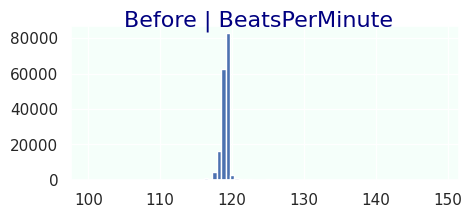

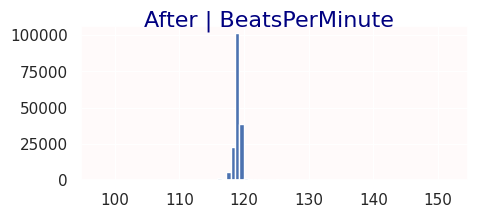

In [8]:
df_Top = pd.read_csv('/kaggle/input/beats-per-minute-ensemble-s5e9/submission.csv')
df_MK  = MKcage6('/kaggle/input/28-september-2025-ps-s5e9/submission_26.37974.csv')

df = pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')

df['BeatsPerMinute'] = df_Top['BeatsPerMinute'] *0.999 + 0.001* df_MK['BeatsPerMinute']

## Submit

In [9]:
# version.1  LB = 26.37985
# version.2  LB = 26.37983
# version.3  err
# version.4  LB = 26.37971
# version.5  LB = 26.37970
# version.6  LB = 26.37968
# version.7  x3
# version.8  LB = 26.37965
# version.9  LB = 26.38054
# version.10 LB = 26.37970

# version.11 LB = ?

df.to_csv('submission.csv', index=False)

df

,id,BeatsPerMinute
0,524164,119.16413
1,524165,118.69846
2,524166,119.33767
3,524167,119.39817
4,524168,119.57005
...,...,...
174717,698881,119.40224
174718,698882,119.30520
174719,698883,119.16740
174720,698884,118.77170


## Appendix_advice

Dear developers, I'm writing for everyone, but not everyone reads this cell. So here's what I want to say:

Don't rush to add dangerous noise to your decisions about blends and cage's – remember the stories of children – for example, a good hero (or heroine) chases a villain (a witch or someone else) to take back something that previously belonged to them – for example, a close relative (a brother or sister). And a kindly old wizard with a gray beard admonishes the witch's pursuer: "If you see a witch throwing down her comb and a forest growing, don't go there under any circumstances – you might not catch her and get stuck in that noisy forest – better yet, go around it," and so on. These submissions that are present here are all without the addition of this magical-miraculous noise. This isn't CNN – why would it be needed here!?

You might win a little at first, but then you'll lose many times more, and thus fall behind.

At the heart of this enterprise—the blend itself (local h-blend)—lies a phenomenon—the re-phenomenon of friendly addition-crossover. This phenomenon is driven by the mathematical apparatus that "lives" in each estimator—be it your favorite XGB, LightGBM, CATboost, or some other—for example, PyTorch or NN-based.

Friends, this is pure phenomenon.

We don't think it deserves some kind of made-up garbage!

h-blend and Cage are in no way "garbage cans"! All they do now, for now, is operate only with the results of powerful estimators—that's all! They don't mix in anything extra, not a single grain.

What you're being offered—either on a discussion channel or by "miracle scientists" here—firstly, none of them have any mathematical justification or proof, and secondly, it might be useful—and even then, only "maybe"—for some minor analysis. p.s. I briefly glanced at these miracle-research-proposals, the American grandmaster has nothing to do with this!

Be vigilant, and don't fall for fairy tales. ML isn't a witch's tale—IT'S GOOD MAGIC!